<a href="https://colab.research.google.com/github/ShreshtaP/-Shreshta_INFO5731_-Fall2021/blob/main/In_class_exercise_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The fourth in-class-exercise (40 points in total, 03/29/2022)**

Question description: Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks:

## (1) (10 points) Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here: 

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [36]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
import itertools
import lxml.html as LH
url = 'https://www.imdb.com/title/tt9376612/reviews?ref_=tt_sa_3'
imdb_url = "https://www.imdb.com"
response = requests.get(url)
movies_soup = BeautifulSoup(response.text, 'lxml')
movie_tags = movies_soup.find_all('a', attrs={'class': None})
movie_tags = [tag.attrs['href'] for tag in movie_tags 
              if tag.attrs['href'].startswith('/title') & tag.attrs['href'].endswith('/')]
movie_tags = list(dict.fromkeys(movie_tags))
movie_links = [imdb_url + tag + 'reviews' for tag in movie_tags]
def minMax(a):
      print(len(a))
      minpos = a.index(min(a))
      maxpos = a.index(max(a))
      return minpos, maxpos
def getReviews(soup):
    review_ratings = [tag.previous_element for tag in 
                           soup.find_all('span', attrs={'class': 'point-scale'})]
    if len(review_ratings) > 0:
      n_index, p_index = minMax(list(map(int, review_ratings)))
      review_list = soup.find_all('a', attrs={'class':'title'})
      reviews = ["https://www.imdb.com" + review['href'] for review in review_list]
      return reviews
    else:
      return None
def getSoup(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup
def getReviewText(review_url):
    soup = getSoup(review_url)
    tag = soup.find('div', attrs={'class': 'text show-more__control'})
    return tag.getText()
movie_soups = getSoup(movie_links[0])
movie_review = getReviews(movie_soups)
imdb_review_texts = [getReviewText(url) for url in movie_review]
user_Names = [getUserName(url) for url in movie_review]

posted_dates = [getReviewPostedDate(url) for url in movie_review]
data = {'Review_text': imdb_review_texts,
        }
df = pd.DataFrame(data) 
df.to_csv("IMDB_reviews.csv")

23


In [37]:
!pip install --upgrade gensim


In [38]:
import spacy.cli
spacy.cli.download("en")

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [39]:
import nltk
nltk.download('stopwords')

import os
def install_java():
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
  !java -version
install_java()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
openjdk version "11.0.11" 2021-04-20
OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.18.04)
OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)


In [40]:
!pip install pyLDAvis

In [41]:
import re
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

In [42]:
# import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
# # Plotting tools
# import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
# import matplotlib.pyplot as plt
# %matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [44]:

from nltk.corpus import stopwords
stop_words = stopwords.words('englishlanguage')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])


In [ ]:
df = pd.read_csv('IMDB_reviews.csv', encoding = "ISO-8859-1")
df.head()

# Convert to list
dataretrieved = df['Review_text'].tolist()

# Remove Emails
dataretrieved = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
dataretrieved = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
dataretrieved = [re.sub("\'", "", sent) for sent in data]

pprint(dataretrieved[:1])

#Tokenization
def sent_to_words(sentencestatement):
    for sentence in sentencestatement:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

no_of_data_words = list(sent_to_words(dataretrieved))

print(no

In [45]:
df = pd.read_csv('IMDB_reviews.csv', encoding = "ISO-8859-1")
df.head()

# Convert to list
dataretrieved = df['Review_text'].tolist()

# Remove Emails
dataretrieved = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
dataretrieved = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
dataretrieved = [re.sub("\'", "", sent) for sent in data]

pprint(dataretrieved[:1])

#Tokenization
def sent_to_words(sentencestatement):
    for sentence in sentencestatement:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

no_of_data_words = list(sent_to_words(dataretrieved))

print(no_of_data_words[:1])

# Creating Bigram and Trigram Models
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])



#Remove Stopwords, Make Bigrams and Lemmatize

# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

#Create the Dictionary and Corpus needed for Topic Modeling
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

['It was an okay movie. Simu Liu is the son of the seemingly immortal master '
 'of the Ten Rings --always good to see Tony Leung, and I hope he soaked '
 'Disney --who winds up opposing his dad, and Awkwafina is his slacker sort-of '
 'girlfriend. They are fine in the leads, as is Menger Zhang as his sister, '
 'and Michelle Yeoh as their aunt -- always good to see her, and I hope she '
 'soaked Disney too.I have grown increasingly fond of martial arts films over '
 'the last couple of decades, and the decline of the movie musical is the '
 'reason why. They dont make movies like that any more, and when they try, '
 'theyre often embarrassing. People dont like the unreality of people bursting '
 'out into song, or expressing their emotions through dance. No, they prefer '
 'the solid commonplace of people floating through space to kick each other in '
 'the head. To me, the fight choreography is its own dance, and the fight '
 'between Leung and Fala Chen when they meet and before the

[[('always', 2),
  ('amount', 1),
  ('aplenty', 1),
  ('astaire', 1),
  ('aunt', 1),
  ('be', 2),
  ('burst', 1),
  ('certain', 1),
  ('challenge', 1),
  ('chinese', 1),
  ('choreography', 1),
  ('commonplace', 1),
  ('connect', 1),
  ('couple', 1),
  ('dance', 3),
  ('decade', 1),
  ('decline', 1),
  ('embarrassing', 1),
  ('emotion', 1),
  ('expectation', 1),
  ('exposition', 1),
  ('express', 1),
  ('fight', 2),
  ('film', 2),
  ('fine', 1),
  ('float', 1),
  ('fond', 1),
  ('girlfriend', 1),
  ('good', 3),
  ('graceful', 1),
  ('grow', 1),
  ('head', 1),
  ('high', 1),
  ('hope', 2),
  ('immense', 1),
  ('immortal', 1),
  ('increasingly', 1),
  ('iron', 1),
  ('kick', 1),
  ('last', 1),
  ('lead', 1),
  ('like', 1),
  ('love', 1),
  ('make', 1),
  ('man', 1),
  ('master', 1),
  ('minute', 1),
  ('movie', 2),
  ('musical', 1),
  ('often', 1),
  ('oppose', 1),
  ('particularly', 1),
  ('people', 3),
  ('power', 1),
  ('prefer', 1),
  ('present', 1),
  ('problem', 1),
  ('reason', 1),

In [57]:
# Building the Topic Model

# Build LDA model
lda_model_sample_ = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=9, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
#View the topics in LDA model

# Print the Keyword in the 10 topics
print(lda_model_sample.print_topics())
doc_lda_sample = lda_model_sample[corpus]

#Compute Model Perplexity and Coherence Score

# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)



[(0,
  '0.015*"character" + 0.012*"film" + 0.012*"new" + 0.010*"fight" + '
  '0.010*"marvel" + 0.009*"year" + 0.007*"bus" + 0.007*"first" + 0.007*"end" + '
  '0.007*"action"'),
 (1,
  '0.001*"movie" + 0.001*"good" + 0.001*"year" + 0.001*"go" + 0.001*"have" + '
  '0.001*"film" + 0.001*"character" + 0.001*"love" + 0.001*"would" + '
  '0.001*"wenwu"'),
 (2,
  '0.008*"scene" + 0.008*"feature" + 0.008*"rescue" + 0.008*"planet" + '
  '0.004*"good" + 0.004*"see" + 0.004*"story" + 0.004*"also" + 0.004*"watch" + '
  '0.004*"great"'),
 (3,
  '0.019*"show" + 0.011*"lead" + 0.010*"talent" + 0.010*"spoiler" + '
  '0.010*"suddenly" + 0.009*"word" + 0.007*"like" + 0.007*"definitely" + '
  '0.006*"actor" + 0.005*"panther"'),
 (4,
  '0.032*"great" + 0.022*"film" + 0.015*"action" + 0.011*"good" + '
  '0.011*"character" + 0.011*"story" + 0.011*"exciting" + 0.011*"set" + '
  '0.007*"well" + 0.007*"say"'),
 (5,
  '0.025*"movie" + 0.011*"character" + 0.011*"good" + 0.010*"would" + '
  '0.010*"scene" + 0.009

In [58]:
# Building the Topic Model with number of topics as 

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=16, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
#View the topics in LDA model

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

#Compute Model Perplexity and Coherence Score

# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)





[(0,
  '0.017*"character" + 0.011*"family" + 0.011*"fight" + 0.011*"bus" + '
  '0.011*"sequence" + 0.011*"entertaining" + 0.011*"almost" + '
  '0.011*"cinematic" + 0.011*"serious" + 0.006*"year"'),
 (1,
  '0.019*"good" + 0.019*"film" + 0.019*"really" + 0.010*"well" + '
  '0.010*"character" + 0.010*"action" + 0.010*"story" + 0.010*"marvel" + '
  '0.010*"effect" + 0.010*"may"'),
 (2,
  '0.001*"love" + 0.001*"would" + 0.001*"movie" + 0.001*"scene" + 0.001*"good" '
  '+ 0.001*"make" + 0.001*"have" + 0.001*"also" + 0.001*"character" + '
  '0.001*"bit"'),
 (3,
  '0.001*"scene" + 0.001*"good" + 0.001*"movie" + 0.001*"fight" + '
  '0.001*"rescue" + 0.001*"see" + 0.001*"feature" + 0.001*"planet" + '
  '0.001*"great" + 0.001*"lead"'),
 (4,
  '0.022*"also" + 0.013*"movie" + 0.013*"scene" + 0.013*"good" + '
  '0.013*"especially" + 0.013*"make" + 0.013*"credit" + 0.013*"big" + '
  '0.013*"quite" + 0.009*"thing"'),
 (5,
  '0.022*"movie" + 0.013*"have" + 0.012*"good" + 0.012*"would" + 0.011*"scene" '

In [60]:
# Building the Topic Model with number of topics as 

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=13, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
#View the topics in LDA model

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

#Compute Model Perplexity and Coherence Score

# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better. 

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v') 
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)




[(0,
  '0.016*"character" + 0.010*"bus" + 0.010*"fight" + 0.010*"family" + '
  '0.010*"entertaining" + 0.010*"sequence" + 0.010*"almost" + '
  '0.010*"cinematic" + 0.010*"serious" + 0.005*"year"'),
 (1,
  '0.001*"movie" + 0.001*"have" + 0.001*"year" + 0.001*"would" + 0.001*"good" '
  '+ 0.001*"come" + 0.001*"love" + 0.001*"character" + 0.001*"give" + '
  '0.001*"go"'),
 (2,
  '0.010*"scene" + 0.010*"feature" + 0.010*"planet" + 0.010*"rescue" + '
  '0.005*"good" + 0.005*"also" + 0.005*"watch" + 0.005*"well" + 0.005*"quite" '
  '+ 0.005*"see"'),
 (3,
  '0.001*"movie" + 0.001*"love" + 0.001*"good" + 0.001*"scene" + 0.001*"see" + '
  '0.001*"fight" + 0.001*"story" + 0.001*"go" + 0.001*"know" + '
  '0.001*"character"'),
 (4,
  '0.020*"also" + 0.012*"movie" + 0.012*"good" + 0.012*"scene" + '
  '0.012*"especially" + 0.012*"make" + 0.012*"big" + 0.012*"quite" + '
  '0.012*"credit" + 0.008*"thing"'),
 (5,
  '0.021*"movie" + 0.011*"good" + 0.010*"scene" + 0.009*"would" + 0.009*"love" '
  '+ 0.00

In [62]:
# Building the Topic Model with number of topics as 

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=18, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
#View the topics in LDA model

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

#Compute Model Perplexity and Coherence Score

# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

#Visualize the topics-keywords



[(0,
  '0.018*"character" + 0.012*"entertaining" + 0.012*"bus" + 0.012*"sequence" + '
  '0.012*"almost" + 0.012*"serious" + 0.012*"family" + 0.012*"cinematic" + '
  '0.012*"fight" + 0.006*"year"'),
 (1,
  '0.041*"movie" + 0.034*"play" + 0.014*"action" + 0.014*"marvel" + '
  '0.014*"watch" + 0.014*"future" + 0.014*"amazing" + 0.007*"give" + '
  '0.007*"xiale" + 0.007*"many"'),
 (2,
  '0.009*"love" + 0.009*"do" + 0.009*"story" + 0.009*"see" + 0.009*"must" + '
  '0.009*"rescue" + 0.009*"scene" + 0.009*"planet" + 0.009*"feature" + '
  '0.005*"make"'),
 (3,
  '0.001*"movie" + 0.001*"good" + 0.001*"fight" + 0.001*"scene" + 0.001*"lead" '
  '+ 0.001*"know" + 0.001*"attack" + 0.001*"show" + 0.001*"great" + '
  '0.001*"go"'),
 (4,
  '0.001*"movie" + 0.001*"good" + 0.001*"scene" + 0.001*"also" + 0.001*"time" '
  '+ 0.001*"thing" + 0.001*"especially" + 0.001*"watch" + 0.001*"lot" + '
  '0.001*"character"'),
 (5,
  '0.024*"movie" + 0.012*"would" + 0.012*"good" + 0.011*"have" + '
  '0.010*"characte

## (2) (10 points) Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [34]:

# Write your code here

#Importing required Library
import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

#import modules
import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

#Loading Data
def load_data(path,file_name):
    
    the_name_of_documents_list = []
    name_of_titles=[]
    with open( os.path.join(path, file_name) ,"r") as fin:
        for line in fin.readlines():
            text = line.strip()
            documents_list.append(text)
    print("Total Number of Documents:",len(the_name_of_documents_list))
    name_of_titles.append( text[0:min(len(text),100)] )
    return the_name_of_documents_list,name_of_titles

#preprocessing of Data

def preprocess_data(doc_set):
    
    # initialize regex tokenizer
    tokenizer = RegexpTokenizer(r'\w+')
    # create English stop words list
    en_stop = set(stopwords.words('english'))
    # Create p_stemmer of class PorterStemmer
    p_stemmer = PorterStemmer()
    # list for tokenized documents in loop
    texts = []
    # loop through document list
    for i in doc_set:
        # clean and tokenize document string
        raw_data = i.lower()
        tokensinfo = tokenizer.tokenize(raw_data)
        # remove stop words from tokens
        stopped_tokens = [i for i in tokens if not i in en_stop]
        # stem tokens
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        # add tokens to list
        texts.append(stemmed_tokens)
    return texts
  
#Preparing Corpus

def prepare_corpus(doc_clean):
    
    # Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
    dictionaryinfo = corpora.Dictionary(doc_clean)
    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    # generate LDA model
    return dictionary,doc_term_matrix

#Creating LSA model
def create_gensim_lsa_model(doc_clean,number_of_topics,words):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    # generate LSA model
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
    print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel

#
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

def plot_graph(doc_clean,start, stop, step):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix,doc_clean,
                                                            stop, start, step)
    # Show graph
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

number_of_topics=7
words=10
document_list,titles=load_data("","IMDB_reviews.csv")
clean_text=preprocess_data(document_list)
model=create_gensim_lsa_model(clean_text,number_of_topics,words)





Total Number of Documents: 27
[(0, '-0.373*"chi" + -0.373*"shang" + -0.311*"wenwu" + -0.269*"ring" + -0.226*"ten" + -0.160*"movi" + -0.146*"kati" + -0.122*"xial" + -0.118*"fight" + -0.106*"year"'), (1, '0.510*"movi" + 0.223*"scene" + 0.191*"mcu" + -0.168*"wenwu" + -0.158*"shang" + -0.158*"chi" + 0.150*"love" + 0.140*"watch" + 0.136*"charact" + 0.132*"like"'), (2, '0.328*"film" + -0.210*"year" + -0.189*"wenwu" + 0.184*"marvel" + 0.182*"chi" + 0.182*"shang" + -0.164*"would" + -0.155*"ring" + 0.126*"great" + -0.120*"ten"'), (3, '-0.258*"marvel" + -0.229*"year" + -0.206*"film" + 0.177*"scene" + -0.165*"charact" + 0.153*"movi" + -0.128*"live" + 0.125*"dark" + -0.116*"came" + -0.115*"saun"'), (4, '-0.188*"show" + -0.146*"panther" + -0.146*"liu" + 0.145*"film" + -0.142*"know" + -0.139*"act" + -0.126*"black" + -0.122*"play" + 0.121*"scene" + -0.119*"lead"'), (5, '-0.276*"new" + -0.168*"look" + 0.160*"marvel" + -0.149*"superhero" + -0.132*"promis" + -0.131*"like" + -0.130*"alon" + -0.123*"chara

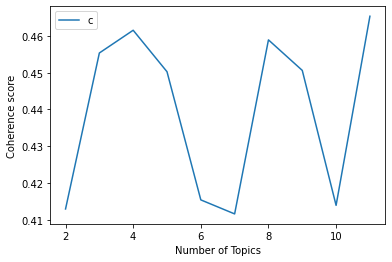

In [35]:
start,stop,step=2,15,1
plot_graph(clean_text,start,stop,step)

## (3) (10 points) Generate K topics by using  lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

In [29]:
!python -m pip install -U lda2vec
from lda2vec import preprocess, Corpus
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

try:
    import seaborn
except:
    pass

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  Created wheel for lda2vec: filename=lda2vec-0.16.10-py3-none-any.whl size=14433 sha256=2ad991b8ff01f97665c4584f5843a446574b08053b95fe5e7122ddcf582780b1
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\74\d3\19\9a711a19d209476de11d2b57df549fad077d2a06e4c391f0b0
Successfully built lda2vec


ModuleNotFoundError: No module named 'tensorflow'

In [21]:
!python -m pip install -U gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [30]:
npz = np.load(open('topics.pyldavis.npz', 'r'))
dat = {k: v for (k, v) in npz.iteritems()}
dat['vocab'] = dat['vocab'].tolist()
# dat['term_frequency'] = dat['term_frequency'] * 1.0 / dat['term_frequency'].sum()

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


FileNotFoundError: [Errno 2] No such file or directory: 'topics.pyldavis.npz'

In [ ]:
top_n = 15
topic_to_topwords = {}
for j, topic_to_word in enumerate(dat['topic_term_dists']):
    top = np.argsort(topic_to_word)[::-1][:top_n]
    msg = 'Topic %i '  % j
    top_words = [dat['vocab'][i].strip()[:35] for i in top]
    message += ' '.join(top_words)
    print message
    topic_to_topwords[j] = top_words

Topic 0 x11r5 xv window xterm server motif font xlib // sunos
Topic 1 jesus son father matthew sin mary g'd disciples christ sins
Topic 2 s1 nsa s2 clipper chip administration q escrow private sector serial number encryption technology
Topic 3 leafs games playoffs hockey game players pens yankees bike phillies
Topic 4 van - 0 pp en 1 njd standings 02 6
Topic 5 out_of_vocabulary out_of_vocabulary anonymity hiv homicide adl ripem bullock encryption technology eff
Topic 6 hiv magi prof erzurum venus van 2.5 million ankara satellite launched
Topic 7 nsa escrow clipper chip encryption government phones warrant vat decrypt wiretap
Topic 8 mac controller shipping disk printer mb ethernet enable os/2 port
Topic 9 leafs cooper weaver karabagh myers agdam phillies flyers playoffs fired
Topic 10 obfuscated = ciphertext jesus gentiles matthew judas { x int
Topic 11 jesus ra bobby faith god homosexuality bible sin msg islam
Topic 12 jesus sin scripture matthew christ islam god sins prophet faith
Topic 13 mac i thanks monitor apple upgrade card connect using windows
Topic 14 i quadra monitor my apple duo hard drive mac mouse thanks
Topic 15 { shipping } + mac mb os/2 $ 3.5 manuals
Topic 16 playoffs morris yankees leafs // pitching players } team wins
Topic 17 :> taxes guns flame .. clinton kids jobs hey drugs
Topic 18 revolver tires pitching saturn ball trigger car ice team engine
Topic 19 stephanopoulos leafs mamma karabagh mr. koresh apartment fired myers sumgait

## (4) (10 points) Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here: 

https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [22]:

import re
import numpy as np
import pandas as pd
from pprint import pprint



In [25]:
!python -m pip install -U gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [26]:
!python -m pip install -U spacy
!python -m pip install -U pyLDAvis
import spacy
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline


In [27]:
!python -m pip install -U BERTopic
from bertopic import BERTopic
model = BERTopic(verbose=True)
df=data[0:500]
docs = df
topics, probabilities = model.fit_transform(docs)
model.get_topic_freq().head(11)


C:\Users\Admin\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\site-packages\pip\_vendor\resolvelib\resolvers.py", line 171, in _merge_into_criterion
    crit = self.state.criteria[name]
KeyError: 'plotly'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Users\Admin\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 519, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "C:\Users\Admin

ModuleNotFoundError: No module named 'bertopic'

## (5) (10 points) Compare the results generated by the two topic modeling algorithms, which one is better? You should explain the reasons in details.

In [ ]:
# Write your answer here (no code needed for this question)
 
As per the coherence score, it can be deduced that LDA algorithm has higher advantage over others with respect to the results obtained.
